# 1. Dasar standar deviasi

In [2]:
import numpy as np

data = [12, 15, 17, 20, 22, 25, 28, 30]

std_pop = np.std(data)
print(f"Standar deviasi populasi: {std_pop:.4f}")

std_sample = np.std(data, ddof=1)
print(f"Standar deviasi sampel: {std_sample:.4f}")

Standar deviasi populasi: 5.9253
Standar deviasi sampel: 6.3344


# 2. Visualisasi Distribusi dengan Standar Deviasi

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
mean = np.mean(data)

<Figure size 1000x600 with 0 Axes>

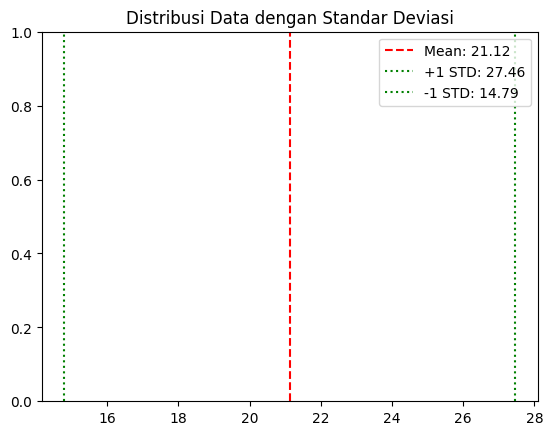

In [11]:
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_sample, color='green', linestyle=':', label=f'+1 STD: {mean + std_sample:.2f}')
plt.axvline(mean - std_sample, color='green', linestyle=':', label=f'-1 STD: {mean - std_sample:.2f}')
plt.legend()
plt.title('Distribusi Data dengan Standar Deviasi')
plt.show()

# 3. Analisis multavariat dengan pandas 

## import library pandas

In [15]:
import pandas as pd

## Dataframe

In [16]:
df = pd.DataFrame({
    'Kelompok A': np.random.normal(50, 10, 100),
    'Kelompok B': np.random.normal(60, 15, 100),
    'Kelompok C': np.random.normal(40, 5, 100)
})

## Count standar deviasi untuk setiap columns

In [17]:
std_results = df.std(ddof=1)
print("\nStandar Deviasi untuk Setiap Kelompok:")
print(std_results)


Standar Deviasi untuk Setiap Kelompok:
Kelompok A    11.313826
Kelompok B    13.620830
Kelompok C     4.887287
dtype: float64


# 4. Uji statistik lanjutan

## import stats dari scipy

In [18]:
from scipy import stats

## Uji perbedaan standar deviasi antara dua kelompok

In [19]:
group1 = df['Kelompok A']
group2 = df['Kelompok B']

## Uji levene

In [20]:
levene_test = stats.levene(group1, group2)
print(f"\nHasil Uji Levene: stat={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")


Hasil Uji Levene: stat=2.7134, p-value=0.1011


In [21]:
if levene_test.pvalue < 0.05:
    print("Terdapat perbedaan signifikan dalam varians (standar deviasi)")
else:
    print("Tidak ada perbedaan signifikan dalam varians")

Tidak ada perbedaan signifikan dalam varians


# 5. Analisis Time Series dengan Rolling Standard Deviation

## Buat data time series 

In [22]:
dates = pd.date_range(start='2023-01-01', periods=100)
ts_data = pd.Series(np.random.normal(0, 1, 100).cumsum(), index=dates)

## Hitung rolling standard deviation (window 7 hari)

In [23]:
rolling_std = ts_data.rolling(window=7).std()

## plot hasil

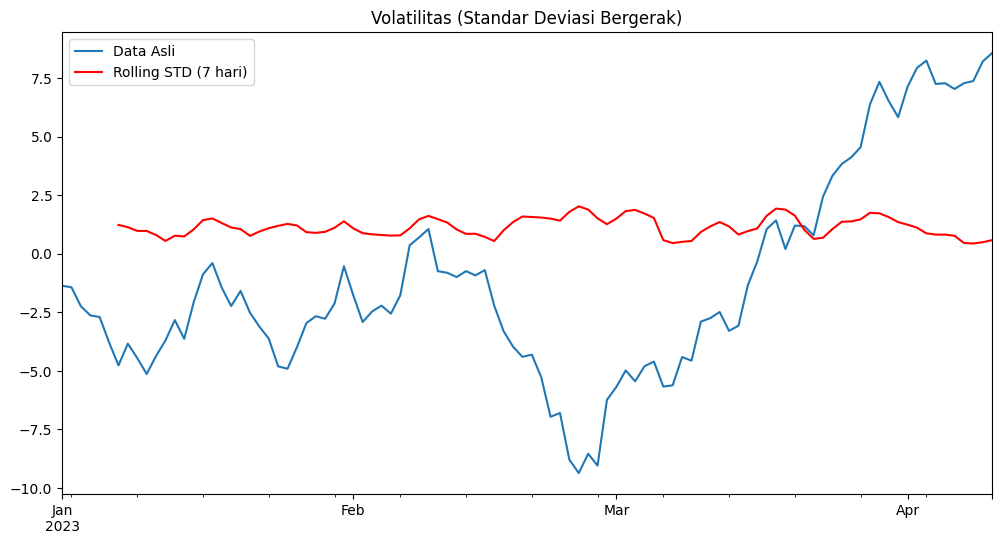

In [24]:
plt.figure(figsize=(12,6))
ts_data.plot(label='Data Asli')
rolling_std.plot(label='Rolling STD (7 hari)', color='red')
plt.title('Volatilitas (Standar Deviasi Bergerak)')
plt.legend()
plt.show()